In [1]:
import os
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras.models import load_model
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Using TensorFlow backend.


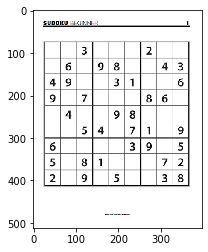

In [2]:
CONST_IMAGE_PATH = './img/10.jpg'
CONST_COEFF = 0.02
originalImage = cv2.imread(CONST_IMAGE_PATH)


img2 = originalImage[:,:,::-1]
plt.imshow(img2)

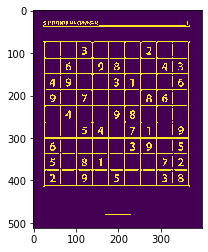

In [4]:
# PREPROCESSING IMAGE
img = cv2.imread(CONST_IMAGE_PATH,0)
img = cv2.medianBlur(img,3)
img = cv2.adaptiveThreshold(img , 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
img = cv2.bitwise_not(img,img)

img_bin = img[:,:]
plt.imshow(img_bin)

In [5]:
# GENERATE CONTOURS
(contours, _) = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea , reverse = True)
screenCnt = None

# FIND BIGGEST RECTANGLE CONTOUR
maxPerimeter=300
count=0
for contour in contours:
    perimeter = cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour, CONST_COEFF*perimeter , True)
    if len(approx) == 4: 
        if perimeter > maxPerimeter: 
            maxPerimeter = perimeter
            screenCnt = approx
    exit

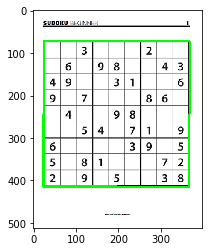

In [6]:
# DRAW GREEN BOX AROUND PUZZLE

cv2.drawContours(originalImage, [screenCnt], -1, (0,255,0), 3)
corners = np.float32(screenCnt)
plt.imshow(originalImage[:,:,::-1])

In [8]:
# GET EXTREME VALUES OF REGION OF INTEREST (ROI)
minX = maxX = screenCnt[0][0][0]
minY = maxY = screenCnt[0][0][1]
for j in range(0, 4):
    if screenCnt[j][0][0] > maxX:
        maxX = screenCnt[j][0][0]
    if screenCnt[j][0][0] < minX:
        minX = screenCnt[j][0][0]
    if screenCnt[j][0][1] > maxY:
        maxY = screenCnt[j][0][1]
    if screenCnt[j][0][1] > maxY:
        minY = screenCnt[j][0][1]
        
# CROP REGION OF INTEREST
x_range = maxX - minX
y_range = maxY - minY

roi_img = img.copy()
roi_img = roi_img[0:y_range, 0:x_range] = img[minY:maxY, minX:maxX]

result = corners.copy()
result[:,:,0]-=minX
result[:,:,1]-=minY
result = np.squeeze(result)
print(result)


[[  1.   0.]
 [  0. 342.]
 [342. 343.]
 [343.   1.]]


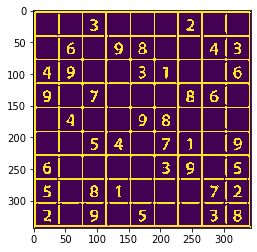

In [11]:
plt.imshow(roi_img[:,:,])